In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_32509/4188623542.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab last 5 years of required data
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]

## Find how many residental units have been added per year

In [6]:
residental_codes = ['R1', 'R2', 'R3', 'R4', 'RC', 'A', 'CM']

# grab all multi family homes in 2004
units_in_19 = pa_2019[(pa_2019['LU'].isin(residental_codes))]

# then, grab all multi family homes in 2005 that are not in 2004
units_added_20 = pa_2020[(~(pa_2020.PID.isin(units_in_19.PID))) & ((pa_2020['LU'].isin(residental_codes)))]

# then grab all multi family homes in 2006 that are not in 2004 or in 2005
units_added_21 = pa_2021[(~(pa_2021.PID.isin(units_added_20.PID) | pa_2021.PID.isin(units_in_19.PID))) & ((pa_2021['LU'].isin(residental_codes)))]

# then grab all multi family homes in 2007 that are not in 2004 or in 2005 or in 2006
units_added_22 = pa_2022[(~(pa_2022.PID.isin(units_added_21.PID) | pa_2022.PID.isin(units_added_20.PID) | pa_2022.PID.isin(units_in_19.PID))) & ((pa_2022['LU'].isin(residental_codes)))]

# continue as before
units_added_23 = pa_2023[(~(pa_2023.PID.isin(units_added_22.PID) | pa_2023.PID.isin(units_added_21.PID) | pa_2023.PID.isin(units_added_20.PID) | pa_2023.PID.isin(units_in_19.PID))) & ((pa_2023['LU'].isin(residental_codes)))]

units_added_24 = pa_2024[(~(pa_2024.PID.isin(units_added_23.PID) | pa_2024.PID.isin(units_added_22.PID) | pa_2024.PID.isin(units_added_21.PID) | pa_2024.PID.isin(units_added_20.PID) | pa_2024.PID.isin(units_in_19.PID))) & ((pa_2024['LU'].isin(residental_codes)))]

# for each year, count the number of non null rows
unit_increase_data = {
    '2020': [units_added_20['PID'].count()],
    '2021': [units_added_21['PID'].count()],
    '2022': [units_added_22['PID'].count()],
    '2023': [units_added_23['PID'].count()],
    '2024': [units_added_24['PID'].count()]
}

# number of residental units added per year
print('Number of residental units added that year')
print('20:', units_added_20['PID'].count())
print('21:', units_added_21['PID'].count())
print('22:', units_added_22['PID'].count())
print('23:', units_added_23['PID'].count())
print('24:', units_added_24['PID'].count())

Number of residental units added that year
20: 435
21: 227
22: 292
23: 211
24: 205


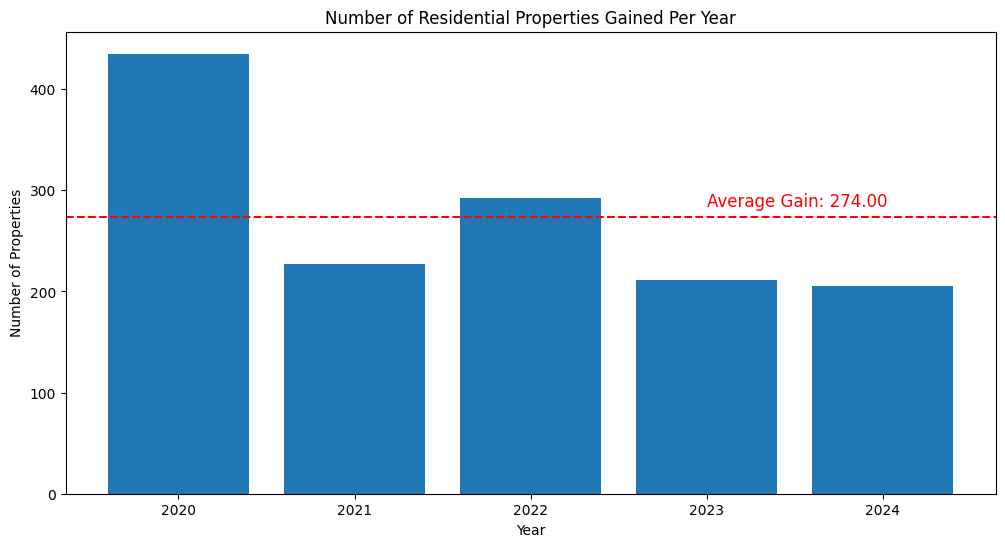

In [8]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_increase_count.index, unit_increase_count.values.flatten())

# add avg
avg = unit_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_increase_count) - 2, avg + 10, f'Average Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Number of Residential Properties Gained Per Year')
plt.show()

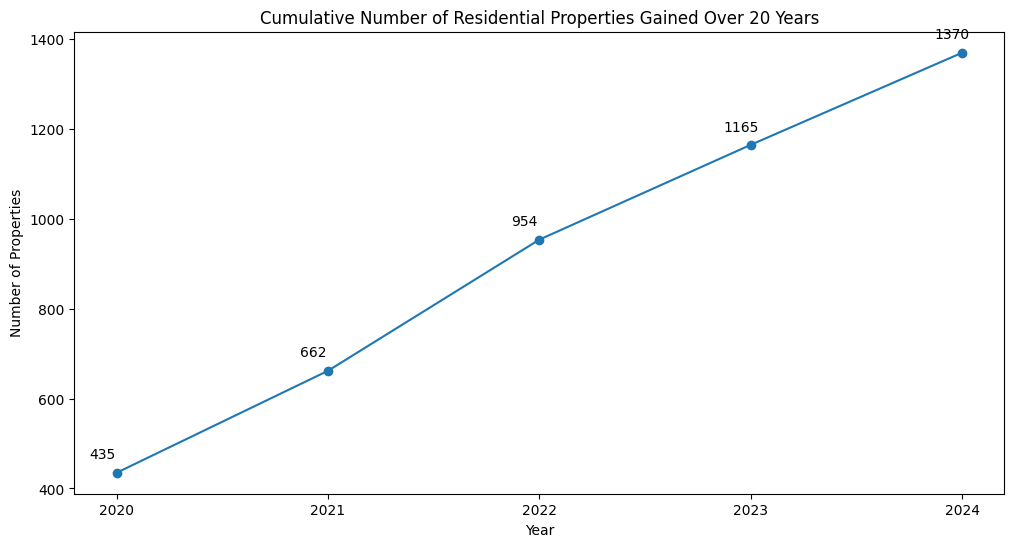

In [9]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Cumulative Number of Residential Properties Gained Over 20 Years')
plt.show()

## Find how many residental units have been lost per year

In [10]:
# grab all multi family homes in 2004

# grab all the multi family homes in 2004 that are not in 2005
units_lost_20 = pa_2019[~pa_2019.PID.isin(pa_2020.PID)]
units_lost_20 = units_lost_20[units_lost_20['LU'].isin(residental_codes)]

# grab all the multi family homes in 2005 that are not in 2006
units_lost_21 = pa_2020[~pa_2020.PID.isin(pa_2021.PID)]
units_lost_21 = units_lost_21[units_lost_21['LU'].isin(residental_codes)]

units_lost_22 = pa_2021[~pa_2021.PID.isin(pa_2022.PID)]
units_lost_22 = units_lost_22[units_lost_22['LU'].isin(residental_codes)]

units_lost_23 = pa_2022[~pa_2022.PID.isin(pa_2023.PID)]
units_lost_23 = units_lost_23[units_lost_23['LU'].isin(residental_codes)]

units_lost_24 = pa_2023[~pa_2023.PID.isin(pa_2024.PID)]
units_lost_24 = units_lost_24[units_lost_24['LU'].isin(residental_codes)]

# for each year, count the number of rows
unit_decrease_data = {
    '2020': [units_lost_20['PID'].count()],
    '2021': [units_lost_21['PID'].count()],
    '2022': [units_lost_22['PID'].count()],
    '2023': [units_lost_23['PID'].count()],
    '2024': [units_lost_24['PID'].count()]
}

# number of units per year
print('Number of residental units lost that year')
print('20:', units_lost_20['PID'].count())
print('21:', units_lost_21['PID'].count())
print('22:', units_lost_22['PID'].count())
print('23:', units_lost_23['PID'].count())
print('24:', units_lost_24['PID'].count())


Number of residental units lost that year
20: 50
21: 47
22: 41
23: 61
24: 41


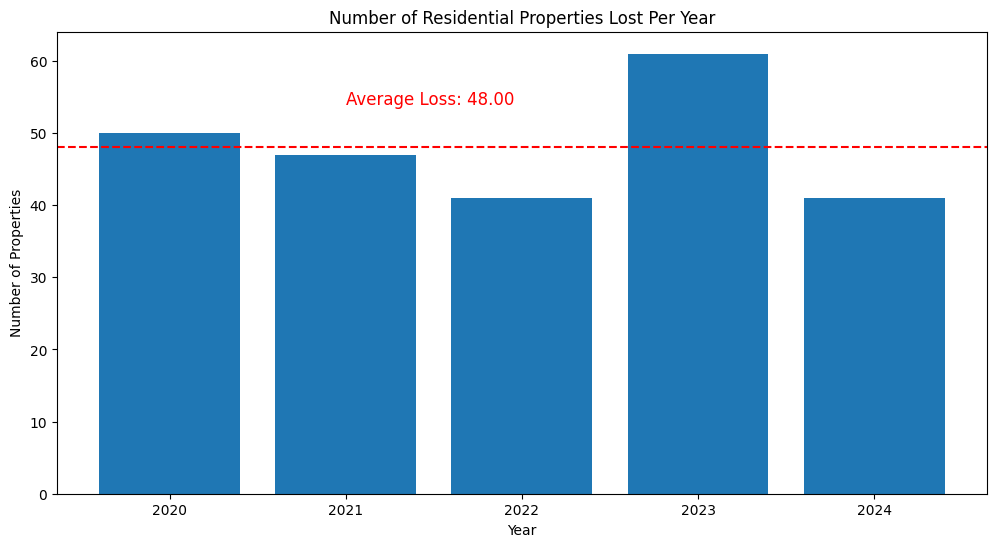

In [11]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_decrease_count.index, unit_decrease_count.values.flatten())

# add avg
avg = unit_decrease_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_decrease_count) - 4, avg + 6, f'Average Loss: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Number of Residential Properties Lost Per Year')
plt.show()

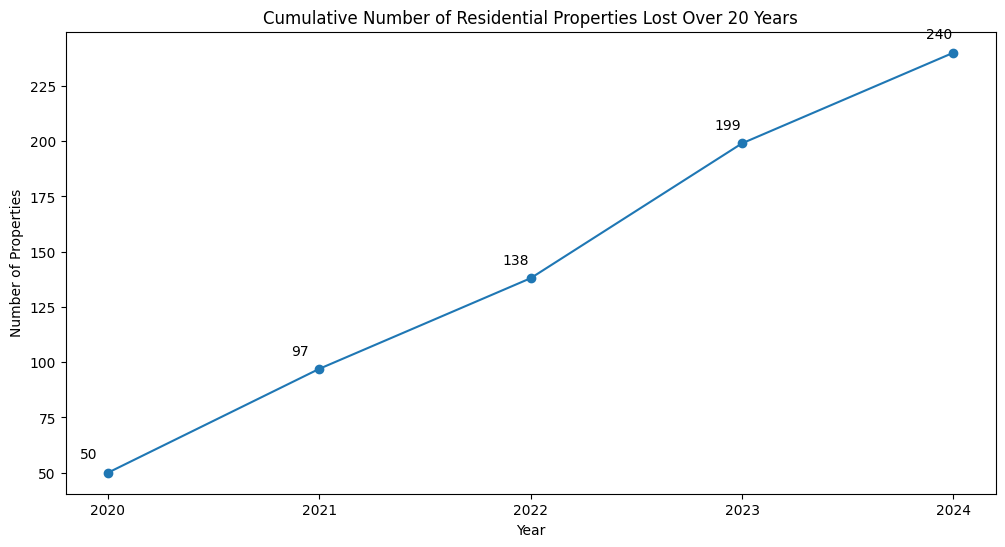

In [12]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_decrease_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Cumulative Number of Residential Properties Lost Over 20 Years')
plt.show()

## Combine findings of how many residental units have been added and lost to find if there has been a net gain or a net loss

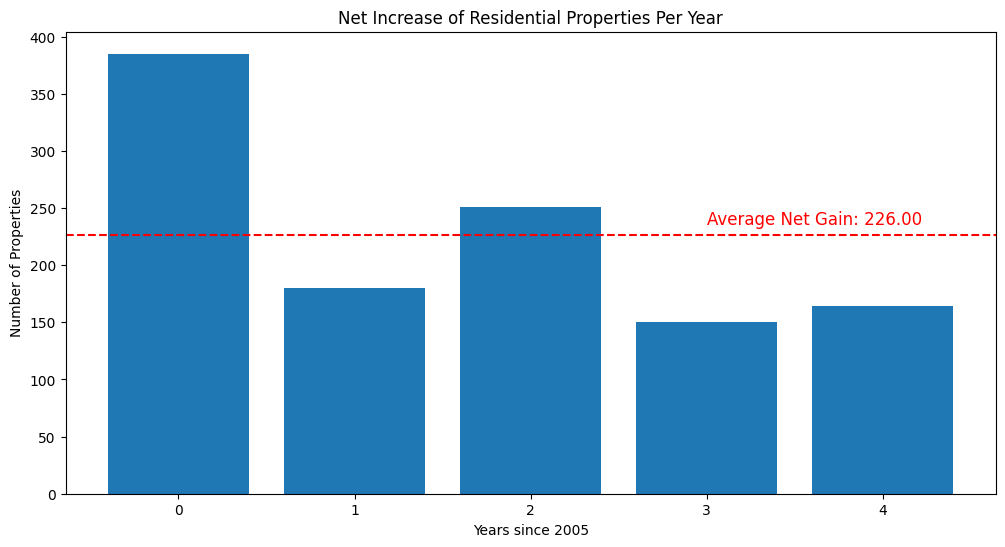

In [16]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

plt.figure(figsize=(12, 6))
plt.bar(unit_net_increase_count.index, unit_net_increase_count.values.flatten())

# add avg
avg = unit_net_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_net_increase_count) - 2, avg + 10, f'Average Net Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Years since 2005')
plt.xticks(unit_net_increase_count.index)
plt.ylabel('Number of Properties')
plt.title('Net Increase of Residential Properties Per Year')
plt.show()

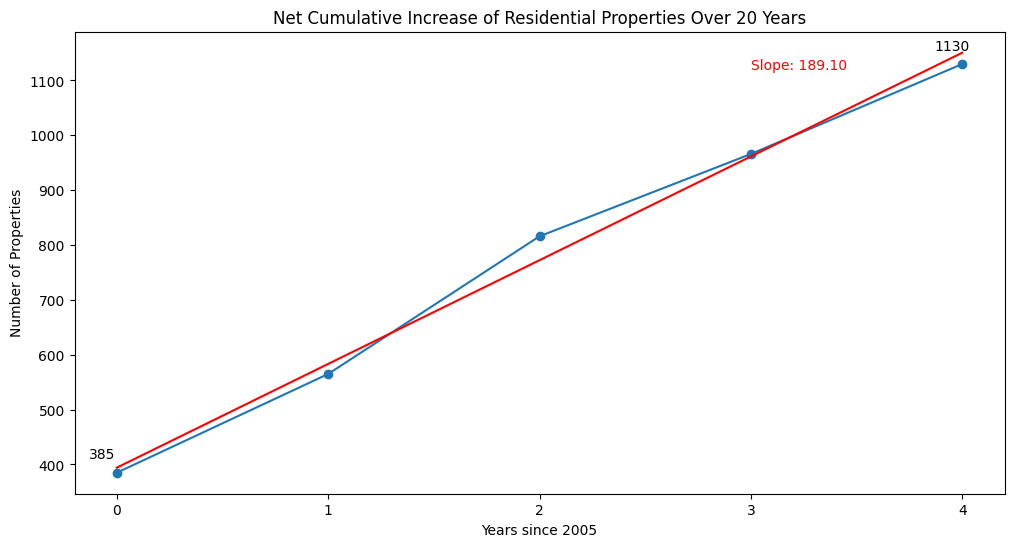

In [20]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

net_cumulative_units = unit_net_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(net_cumulative_units.index, net_cumulative_units.values.flatten(), marker='o', linestyle='-')

slope, intercept, r_value, p_value, std_err = linregress(net_cumulative_units.index, net_cumulative_units.values.flatten())
# Plot best fit line
plt.plot(net_cumulative_units.index, slope*net_cumulative_units.index + intercept, color='red', label=f'Best Fit Line (Slope: {slope:.2f})')
# Print slope on the graph
plt.text(3, max(net_cumulative_units.values.flatten()) - 10, f'Slope: {slope:.2f}', fontsize=10, color='red')

plt.annotate(f'{net_cumulative_units.values.flatten()[0]}', xy=(net_cumulative_units.index[0], net_cumulative_units.values.flatten()[0]), xytext=(-20, 10), textcoords='offset points')
plt.annotate(f'{net_cumulative_units.values.flatten()[-1]}', xy=(net_cumulative_units.index[-1], net_cumulative_units.values.flatten()[-1]), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Years since 2005')
plt.xticks(unit_net_increase_count.index)
plt.ylabel('Number of Properties')
plt.title('Net Cumulative Increase of Residential Properties Over 20 Years')
plt.show()

## Use the year remodeled column and check land usage before and after remodel if available

In [21]:
remodel_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'YR_REMODEL']]

In [22]:
# preprocess remodel data
# change year remodel column names for 21, 22, 23, and 24 to match other years
remodel_2021.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2022.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2023.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2024.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)

In [23]:
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

19: 174668
20: 175052
21: 177091
22: 178598
23: 180627
24: 182242


In [24]:
#drop null rows
remodel_2019 = remodel_2019.dropna()
remodel_2020 = remodel_2020.dropna()
remodel_2021 = remodel_2021.dropna()
remodel_2022 = remodel_2022.dropna()
remodel_2023 = remodel_2023.dropna()
remodel_2024 = remodel_2024.dropna()

In [25]:
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

19: 132872
20: 88795
21: 84939
22: 92092
23: 85400
24: 86718


In [26]:
# drop rows that have a remodel year outside of what we can check LU codes for
remodel_2019 = remodel_2019[(remodel_2019['YR_REMOD'] >= 2005) & (remodel_2019['YR_REMOD'] <= 2023)] 
remodel_2020 = remodel_2020[(remodel_2020['YR_REMOD'] >= 2005) & (remodel_2020['YR_REMOD'] <= 2023)] 
remodel_2021 = remodel_2021[(remodel_2021['YR_REMOD'] >= 2005) & (remodel_2021['YR_REMOD'] <= 2023)] 
remodel_2022 = remodel_2022[(remodel_2022['YR_REMOD'] >= 2005) & (remodel_2022['YR_REMOD'] <= 2023)] 
remodel_2023 = remodel_2023[(remodel_2023['YR_REMOD'] >= 2005) & (remodel_2023['YR_REMOD'] <= 2023)] 
remodel_2024 = remodel_2024[(remodel_2024['YR_REMOD'] >= 2005) & (remodel_2024['YR_REMOD'] <= 2023)] 

In [27]:
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

19: 34276
20: 37069
21: 38342
22: 42687
23: 41750
24: 43998


In [28]:
# combine all available data into one data frame
remodel_df = pd.concat([remodel_2019, remodel_2020, remodel_2021, remodel_2022, remodel_2023, remodel_2024])

print(remodel_df['PID'].count())

238122


In [29]:
# drop any duplicate rows
remodel_df = remodel_df.drop_duplicates(subset=['PID', 'YR_REMOD'], keep='first')
remodel_df = remodel_df.reset_index(drop=True)

# convert from float to int
remodel_df['YR_REMOD'] = remodel_df['YR_REMOD'].astype(int)

print(remodel_df['PID'].count())

53203


In [30]:
remodel_df.head(25)

,PID,YR_REMOD
0,502550008,2006
1,502550012,2016
2,502550016,2014
3,502551004,2017
4,502551006,2009
5,502551008,2005
6,502551010,2005
7,502553014,2015
8,502554000,2008
9,502554002,2008


In [31]:
remodel_2019 = remodel_df[remodel_df['YR_REMOD'] == 2019]
remodel_2020 = remodel_df[remodel_df['YR_REMOD'] == 2020]
remodel_2021 = remodel_df[remodel_df['YR_REMOD'] == 2021]
remodel_2022 = remodel_df[remodel_df['YR_REMOD'] == 2022]
remodel_2023 = remodel_df[remodel_df['YR_REMOD'] == 2023]

In [32]:
# grab the land usage values for all properties that have reno year values for each
lu_19 = (pa_2019[pa_2019.PID.isin(remodel_df.PID)]).copy()
lu_19.rename(columns={'LU': '2019_LU'}, inplace=True)

lu_20 = (pa_2020[pa_2020.PID.isin(remodel_df.PID)]).copy()
lu_20.rename(columns={'LU': '2020_LU'}, inplace=True)

lu_21 = (pa_2021[pa_2021.PID.isin(remodel_df.PID)]).copy()
lu_21.rename(columns={'LU': '2021_LU'}, inplace=True)

lu_22 = (pa_2022[pa_2022.PID.isin(remodel_df.PID)]).copy()
lu_22.rename(columns={'LU': '2022_LU'}, inplace=True)

lu_23 = (pa_2023[pa_2023.PID.isin(remodel_df.PID)]).copy()
lu_23.rename(columns={'LU': '2023_LU'}, inplace=True)

lu_24 = (pa_2024[pa_2024.PID.isin(remodel_df.PID)]).copy()
lu_24.rename(columns={'LU': '2024_LU'}, inplace=True)


In [33]:
remodel_2020 = pd.merge(remodel_2020, lu_19, on='PID').merge(lu_21, on='PID')
remodel_2021 = pd.merge(remodel_2021, lu_20, on='PID').merge(lu_22, on='PID')
remodel_2022 = pd.merge(remodel_2022, lu_21, on='PID').merge(lu_23, on='PID')
remodel_2023 = pd.merge(remodel_2023, lu_22, on='PID').merge(lu_24, on='PID')

In [35]:
changed_20 = remodel_2020[remodel_2020['2019_LU'] != remodel_2020['2021_LU']]
changed_21 = remodel_2021[remodel_2021['2020_LU'] != remodel_2021['2022_LU']]
changed_22 = remodel_2022[remodel_2022['2021_LU'] != remodel_2022['2023_LU']]
changed_23 = remodel_2023[remodel_2023['2022_LU'] != remodel_2023['2024_LU']]

In [36]:
total_remodels = remodel_2019.size + remodel_2020.size + remodel_2021.size + remodel_2022.size + remodel_2023.size

total_remodels

41880

In [37]:
total_changed = changed_20.size + changed_21.size + changed_22.size + changed_23.size

total_changed

580

In [39]:
# find number of lost residental properties
lost = (changed_20[(changed_20['2019_LU'].isin(residental_codes)) & ~(changed_20['2021_LU'].isin(residental_codes))]).size
lost += (changed_21[(changed_21['2020_LU'].isin(residental_codes)) & ~(changed_21['2022_LU'].isin(residental_codes))]).size
lost += (changed_22[(changed_22['2021_LU'].isin(residental_codes)) & ~(changed_22['2023_LU'].isin(residental_codes))]).size
lost += (changed_23[(changed_23['2022_LU'].isin(residental_codes)) & ~(changed_23['2024_LU'].isin(residental_codes))]).size

lost

20

In [40]:
# find number of gained residental properties
gained = (changed_20[~(changed_20['2019_LU'].isin(residental_codes)) & (changed_20['2021_LU'].isin(residental_codes))]).size
gained += (changed_21[~(changed_21['2020_LU'].isin(residental_codes)) & (changed_21['2022_LU'].isin(residental_codes))]).size
gained += (changed_22[~(changed_22['2021_LU'].isin(residental_codes)) & (changed_22['2023_LU'].isin(residental_codes))]).size
gained += (changed_23[~(changed_23['2022_LU'].isin(residental_codes)) & (changed_23['2024_LU'].isin(residental_codes))]).size

gained

164

In [41]:
# find number of properties that were residental and stayed residental
stayed = (changed_20[(changed_20['2019_LU'].isin(residental_codes)) & (changed_20['2021_LU'].isin(residental_codes))]).size
stayed += (changed_21[(changed_21['2020_LU'].isin(residental_codes)) & (changed_21['2022_LU'].isin(residental_codes))]).size
stayed += (changed_22[(changed_22['2021_LU'].isin(residental_codes)) & (changed_22['2023_LU'].isin(residental_codes))]).size
stayed += (changed_23[(changed_23['2022_LU'].isin(residental_codes)) & (changed_23['2024_LU'].isin(residental_codes))]).size

stayed

284

In [42]:
unchanged_20 = remodel_2020[remodel_2020['2019_LU'] == remodel_2020['2021_LU']]
unchanged_20 = unchanged_20[(unchanged_20['2019_LU'].isin(residental_codes))]

unchanged_21 = remodel_2021[remodel_2021['2020_LU'] == remodel_2021['2022_LU']]
unchanged_21 = unchanged_21[(unchanged_21['2020_LU'].isin(residental_codes))]

unchanged_22 = remodel_2022[remodel_2022['2021_LU'] == remodel_2022['2023_LU']]
unchanged_22 = unchanged_22[(unchanged_22['2021_LU'].isin(residental_codes))]

unchanged_23 = remodel_2023[remodel_2023['2022_LU'] == remodel_2023['2024_LU']]
unchanged_23 = unchanged_23[(unchanged_23['2022_LU'].isin(residental_codes))]

In [43]:
unchanged_20.head(20)

,PID,YR_REMOD,2019_LU,2021_LU
0,106374000,2020,R2,R2
1,304805000,2020,RC,RC
2,402558000,2020,R4,R4
3,402559000,2020,R4,R4
4,402807000,2020,R4,R4
5,501324000,2020,RC,RC
6,501821000,2020,A,A
8,503545000,2020,CM,CM
12,603932000,2020,R4,R4
17,801401100,2020,A,A


In [44]:
total_unchanged = unchanged_20.size + unchanged_21.size + unchanged_22.size + unchanged_23.size

total_unchanged

17616

In [45]:
remodels_related_to_residental = lost + gained + stayed + total_unchanged

remodels_related_to_residental

18084

In [46]:
stayed_residental = stayed + total_unchanged

stayed_residental

17900